In this notebook we will evaluate different combinations of features.

- Dataset = GTZAN
- Model = SVM


In [1]:
import numpy as np
# import matplotlib.pyplot as plt
# import IPython
# from scipy import signal
# import librosa.display
# import librosa
# import sklearn
from sklearn import ensemble, model_selection, svm, pipeline, preprocessing, metrics
from pathlib import Path
from sklearn.decomposition import PCA


In [2]:
def report(y_true, y_pred):
    r = metrics.classification_report(y_true=y_true, y_pred=y_pred)
    print(r)

    metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)

    f1 = metrics.f1_score(y_true=labels, y_pred=y_pred, average='weighted')
    print(f'F1: {f1}')

    

## Load labels

In [3]:
datapath = Path('data_npy/gtzan')

labels = np.load(datapath / 'labels_train.npy')
np.unique(labels)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

## Model

In [4]:
clf = svm.SVC()

pipe = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('dim_reduction', PCA(n_components=100)),
        ('clf', clf),
    ]
)

pipe_nopca = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('clf', clf),
    ]
)

cv = model_selection.StratifiedKFold(n_splits=10)

## Feature: Tempo

Features: (799, 1)


/Users/lachlanfitzgibbon/opt/anaconda3/envs/genclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlanfitzgibbon/opt/anaconda3/envs/genclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlanfitzgibbon/opt/anaconda3/envs/genclass/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        80
   classical       0.13      0.12      0.13        80
     country       0.19      0.04      0.06        80
       disco       0.18      0.60      0.28        80
      hiphop       0.23      0.57      0.33        80
        jazz       0.06      0.01      0.02        79
       metal       0.00      0.00      0.00        80
         pop       0.12      0.14      0.13        80
      reggae       0.24      0.40      0.30        80
        rock       0.00      0.00      0.00        80

    accuracy                           0.19       799
   macro avg       0.11      0.19      0.12       799
weighted avg       0.11      0.19      0.12       799

F1: 0.12488337945548926


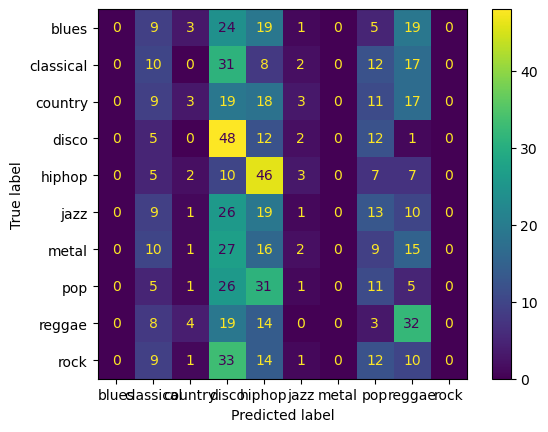

In [5]:
features = np.load(datapath / 'tempo.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe_nopca, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: SC

Spectral Contrast

Features: (799, 9030)
              precision    recall  f1-score   support

       blues       0.43      0.55      0.48        80
   classical       0.69      0.85      0.76        80
     country       0.41      0.64      0.50        80
       disco       0.33      0.33      0.33        80
      hiphop       0.56      0.28      0.37        80
        jazz       0.79      0.29      0.43        79
       metal       0.65      0.89      0.75        80
         pop       0.39      0.72      0.50        80
      reggae       0.46      0.20      0.28        80
        rock       0.32      0.12      0.18        80

    accuracy                           0.49       799
   macro avg       0.50      0.49      0.46       799
weighted avg       0.50      0.49      0.46       799

F1: 0.4574338878935102


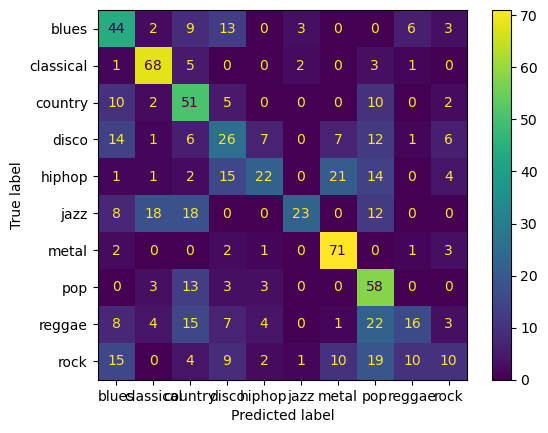

In [6]:
features = np.load(datapath / 'sc.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: MFCC

In [7]:
features = np.load(datapath / 'mfcc.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

Features: (799, 25800)


              precision    recall  f1-score   support

       blues       0.79      0.39      0.52        80
   classical       0.86      0.91      0.88        80
     country       0.46      0.44      0.45        80
       disco       0.44      0.51      0.47        80
      hiphop       0.47      0.44      0.45        80
        jazz       0.66      0.59      0.63        79
       metal       0.67      0.85      0.75        80
         pop       0.67      0.78      0.72        80
      reggae       0.61      0.47      0.54        80
        rock       0.37      0.47      0.42        80

    accuracy                           0.59       799
   macro avg       0.60      0.59      0.58       799
weighted avg       0.60      0.59      0.58       799

F1: 0.5822219250670028


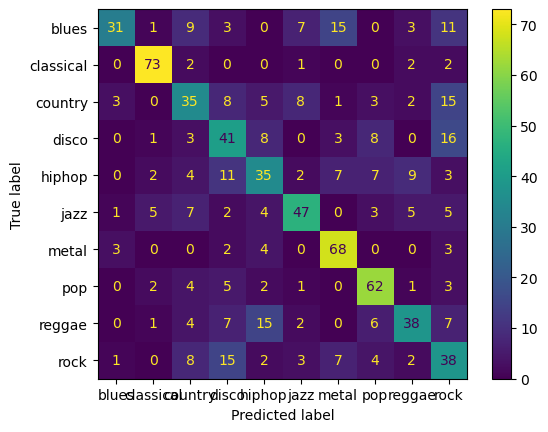

In [8]:
report(labels, y_pred)

## Feature: STFT

In [11]:
features = np.load(datapath / 'stft.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=4
)

Features: (799, 661125)


KeyboardInterrupt: 

In [ ]:
report(labels, y_pred)

## Feature: MFCC + STFT

In [ ]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'stft.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=2
)

report(labels, y_pred)

## Feature: MFCC + SC

In [ ]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=2
)

report(labels, y_pred)

## Feature: MFCC + SC + Tempo

In [ ]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
    np.load(datapath / 'tempo.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=2
)

report(labels, y_pred)